$$
\frac{df}{dx}\bigg|_i=\frac{f_{i+1}-f_i}{\Delta x}-\frac{\Delta x}{2!}\frac{d^2f}{dx^2}\bigg|_i-...
$$
$$
\frac{df}{dx}\bigg|_i=\frac{f_{i+1}-f_{i-1}}{2\Delta x}-\frac{(\Delta x)^2}{3!}\frac{d^3f}{dx^3}-...
$$
$$
\frac{df}{dx}\bigg|_i=\frac{-f_{i+2}+8f_{i+1}-8f_{i-1}+f_{i-2}}{12\Delta x}+\frac{4(\Delta x)^4}{5!}\frac{d^5f}{dx^5}\bigg|_i+...
$$

In [2]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [3]:
def u(x):
    return jnp.sin(x)/(x**3)

In [4]:
grid_sizes=jnp.linspace(5e-2,1,100)

In [5]:
def first_order_forward_difference(u, x, h):
    return (u(x + h) - u(x)) / h

def second_order_central_difference(u, x, h):
    return (u(x + h) - u(x - h)) / (2 * h)

def fourth_order_central_difference(u, x, h):
    return ( -u(x + 2*h) + 8*u(x + h) - 8*u(x - h) + u(x - 2*h) ) / (12 * h)

In [6]:
X=4.0
exact_derivative=jnp.cos(X)/(X**3) - 3*jnp.sin(X)/(X**4)
errors_forward=jnp.abs(first_order_forward_difference(u, X, grid_sizes) - exact_derivative)
errors_second=jnp.abs(second_order_central_difference(u, X, grid_sizes) - exact_derivative)
errors_fourth=jnp.abs(fourth_order_central_difference(u, X, grid_sizes) - exact_derivative)

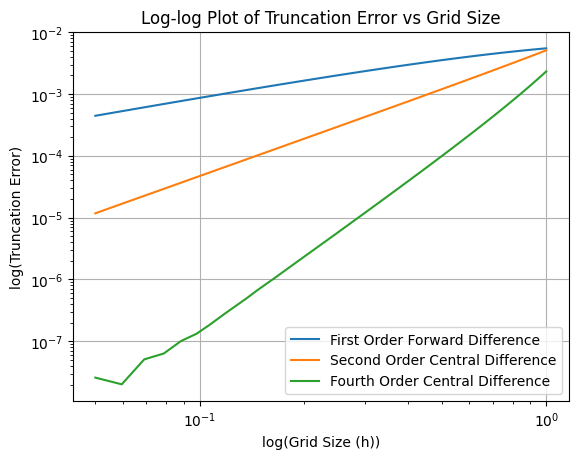

In [7]:
plt.figure()
plt.loglog(grid_sizes, errors_forward, label='First Order Forward Difference')
plt.loglog(grid_sizes, errors_second, label='Second Order Central Difference')
plt.loglog(grid_sizes, errors_fourth, label='Fourth Order Central Difference')
plt.xlabel('log(Grid Size (h))')
plt.ylabel('log(Truncation Error)')
plt.title('Log-log Plot of Truncation Error vs Grid Size')
plt.legend()
plt.grid(True)
plt.savefig("5.png")
plt.show()